In [48]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install --upgrade scikit-learn

In [51]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from scipy.stats import entropy
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from bioinfokit.visuz import cluster
import psutil

In [53]:
data = pd.read_csv("mcdonalds.csv")

data1 = data.copy()

In [54]:
print(data.columns.values.tolist())

print("Data shape:", data.shape)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Data shape: (1453, 15)


In [55]:
print(data.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  


In [56]:
MD = data.iloc[:, 0:11].replace({"Yes": 1, "No": 0})

In [57]:
mean = round(MD.mean(), 2)
print("Mean values:\n", mean)

Mean values:
 yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [58]:
pca = PCA()
MD_pca = pca.fit_transform(MD)
loadings = pca.components_

In [59]:
SD = np.sqrt(pca.explained_variance_)
PV = pca.explained_variance_ratio_

In [60]:
index = [f"PC{i+1}" for i in range(len(SD))]
summary = pd.DataFrame({
    "Standard Deviation": SD, 
    "Proportion of Variance": PV, 
    "Cumulative Proportion": PV.cumsum()
}, index=index)

In [61]:
print("PCA Summary:\n", summary)

PCA Summary:
       Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757050                0.299447               0.299447
PC2             0.607456                0.192797               0.492244
PC3             0.504619                0.133045               0.625290
PC4             0.398799                0.083096               0.708386
PC5             0.337405                0.059481               0.767866
PC6             0.310275                0.050300               0.818166
PC7             0.289697                0.043849               0.862015
PC8             0.275122                0.039548               0.901563
PC9             0.265251                0.036761               0.938323
PC10            0.248842                0.032353               0.970677
PC11            0.236903                0.029323               1.000000


In [62]:
print("Standard Deviation:\n", SD.round(1))

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [63]:
load = pca.components_

rot_df = pd.DataFrame(load.T, index=MD.columns, columns=index)
rot_df = round(-rot_df, 3)

print("Rotation Matrix:\n", rot_df)

Rotation Matrix:
               PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304 -0.055 -0.308  0.171  0.281  0.013  0.572   
convenient -0.155  0.016 -0.063  0.142  0.278 -0.348  0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037 -0.198  0.071 -0.355 -0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322  0.354 -0.073 -0.407  0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802 -0.254  0.361  0.209 -0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065  0.097  0.108 -0.595  0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149 -0.119 -0.129 -0.103  0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287  0.003 -0.211 -0.077 -0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024 -0.068 -0.003 -0.261  0.068  0.030  0.067   
healthy    -0.214  0.077  0.192 -0.763  0.288 -0.178  0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089 -0.370 -0.729 -0.211  0.027 -0.167 -0.072   

             PC10   PC11  
yummy      -0.110  0.045  
con

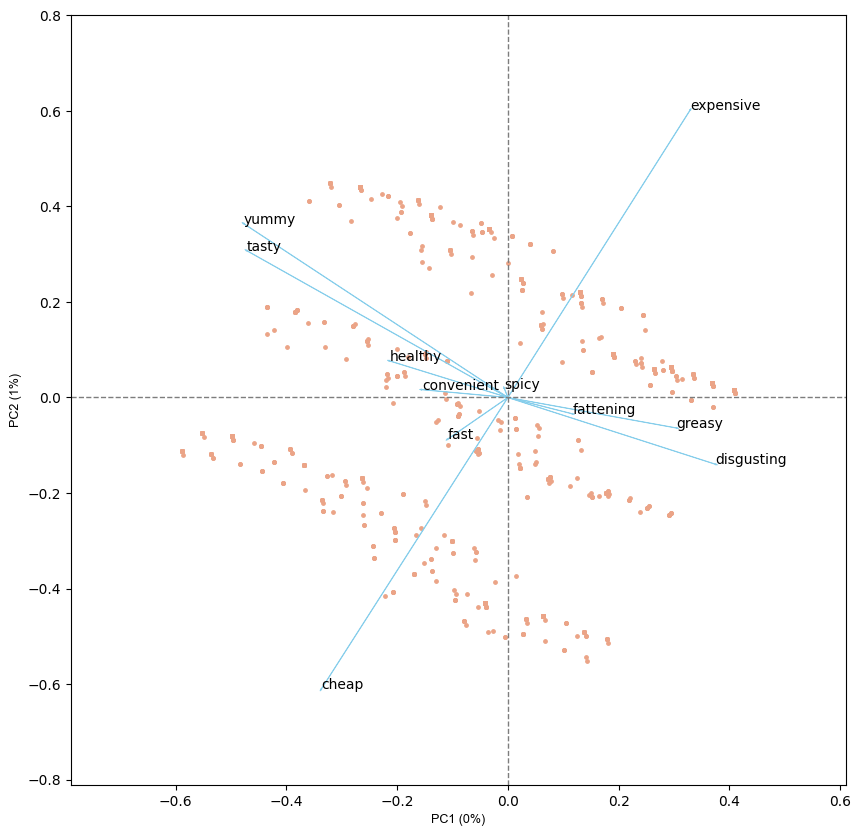

In [64]:
cluster.biplot(cscore=MD_pca, loadings=-load, labels=data.columns.values, var1=0, var2=1, show=True, dim=(10, 10))

In [65]:
np.random.seed(1234)
nrep = 10
segments_range = range(2, 6) 
within_cluster_sums = []
cluster_models = {}

In [79]:
MD_km28 = {}

In [91]:
for clusters in segments_range:
    kmeans_model = KMeans(n_clusters=clusters, n_init=10, random_state=1234)
    kmeans_model.fit(MD)  # Fit the model to your data
    MD_km28[clusters] = kmeans_model

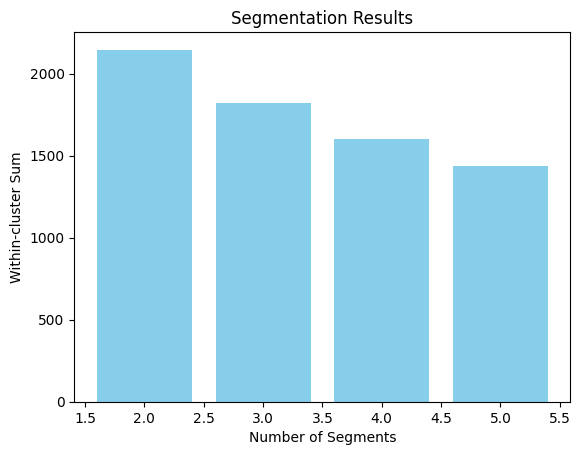

In [80]:
plt.bar(segments_range, within_cluster_sums, color='skyblue')
plt.xlabel("Number of Segments")
plt.ylabel("Within-cluster Sum")
plt.title("Segmentation Results")
plt.show()

In [81]:
nboot = 50  
bootstrap_samples = [resample(MD.values, random_state=1234) for _ in range(nboot)]
adjusted_rand_index = []

In [82]:
for k in segments_range:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

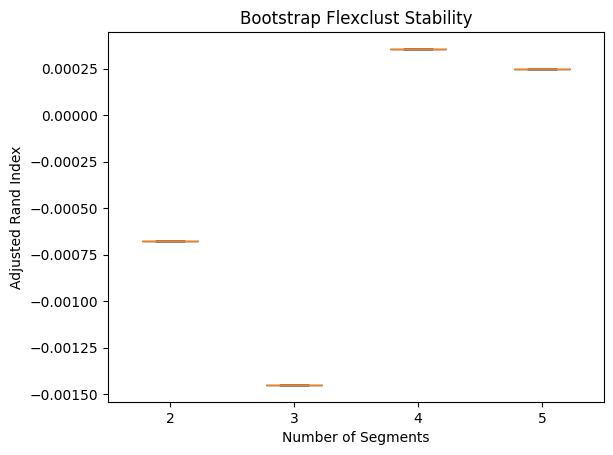

In [83]:
plt.boxplot(np.array(adjusted_rand_index).T, labels=segments_range, whis=10, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust Stability")
plt.show()

In [84]:
segment_labels = {str(segment): cluster_models[str(segment)].predict(MD) for segment in segments_range}
segment_similarity_values = []
for segment in segment_labels.keys():
    similarities = cluster_models[segment].transform(MD).min(axis=1)
    normalized_similarities = similarities / np.max(similarities)
    segment_similarity_values.append(normalized_similarities)

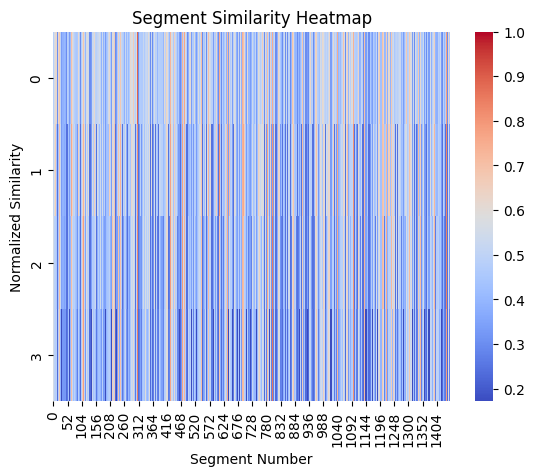

In [85]:
sns.heatmap(segment_similarity_values, cmap='coolwarm', annot=False)
plt.title("Segment Similarity Heatmap")
plt.xlabel("Segment Number")
plt.ylabel("Normalized Similarity")
plt.show()

In [86]:
MD_model_info = []
for k in segments_range:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD)
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    counts = np.bincount(model.labels_)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    MD_model_info.append((k, aic, bic, icl))

In [87]:
MD_model_info = pd.DataFrame(MD_model_info, columns=["k", "AIC", "BIC", "ICL"])

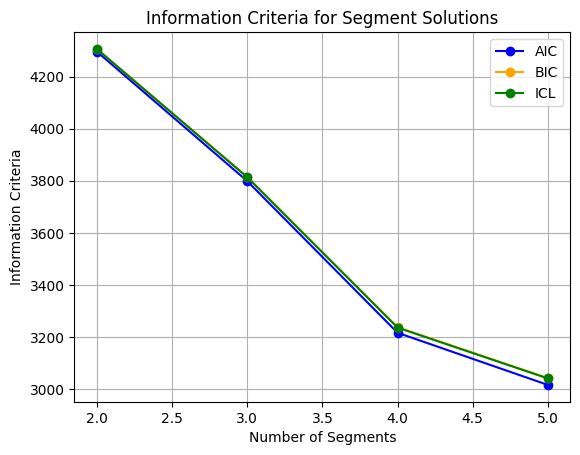

In [88]:
plt.plot(MD_model_info["k"], MD_model_info["AIC"], marker='o', color='blue', label='AIC')
plt.plot(MD_model_info["k"], MD_model_info["BIC"], marker='o', color='orange', label='BIC')
plt.plot(MD_model_info["k"], MD_model_info["ICL"], marker='o', color='green', label='ICL')
plt.xlabel('Number of Segments')
plt.ylabel('Information Criteria')
plt.title('Information Criteria for Segment Solutions')
plt.legend()
plt.grid(True)
plt.show()

KeyError: '1'

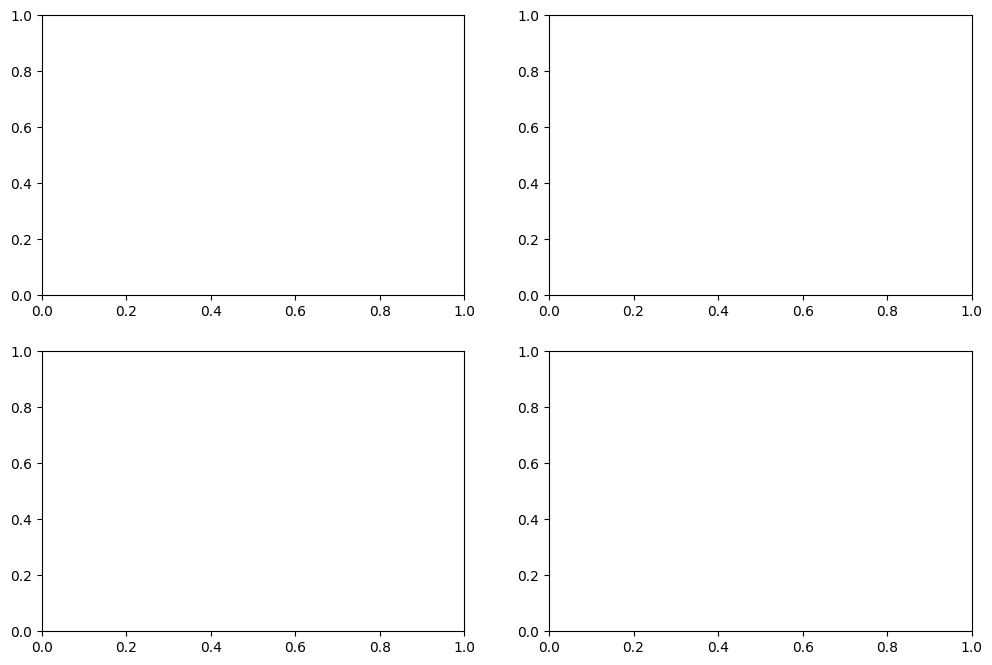

In [90]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(1, 5):  # Iterate through clusters 1 to 4
    kmeans_model = MD_km28[str(i)]  # Get the KMeans model for this cluster
    labels = kmeans_model.predict(MD)  # Predict labels for the dataset MD
    similarities = kmeans_model.transform(MD).min(axis=1)  # Get min distance to centroids

    row, col = (i - 1) // 2, (i - 1) % 2  # Determine position in 2x2 grid
    axs[row, col].hist(similarities, bins=10, range=(0, 1))  # Plot histogram
    axs[row, col].set_title(f'Cluster {i}')  # Set the title
    axs[row, col].set_xlabel('Similarity')  # Set x-axis label
    axs[row, col].set_ylabel('Frequency')  # Set y-axis label

plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
ct = pd.crosstab(cluster_models['4'].labels_, data1['Gender'])
mosaic(ct.stack(), gap=0.01, properties=lambda key: {'color': 'blue' if 'Male' in key else 'green'})
plt.title("Mosaic Plot of Gender by Segment")
plt.show()

In [ ]:
df_segment = pd.DataFrame({'Segment': cluster_models['4'].labels_, 'Age': data['Age']})
df_segment.boxplot(by='Segment', column='Age', grid=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Age Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.suptitle('')
plt.show()

In [ ]:
plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Plot')
plt.xticks(range(2, 6))
plt.legend()
plt.grid(True)
plt.show()